In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
print(np.__version__)
import numba
print(numba.__version__)
import umap
import networkx as nx
from math import ceil, sqrt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

2.2.0
0.61.2


# PCA Data Visualization

Setting up entire dataset

In [15]:
PCA = pd.read_csv("PCAoutputs/pca_results.eigenvec", sep='\s+', header=0)
pop_data = pd.read_csv('data/20130606_g1k_3202_samples_ped_population.txt', sep='\s+')

# display(PCA.columns)
# display(pop_data[['FamilyID', 'SampleID']].iloc[44])
# display(PCA[['#IID']].iloc[44])
# display(pop_data.head)
# display(PCA.head)

# merge
merged = PCA.merge(pop_data, left_on='#IID', right_on='SampleID', how='left')
merged.columns = merged.columns.str.strip()
display(merged.head())



,#IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC18,PC19,PC20,FamilyID,SampleID,FatherID,MotherID,Sex,Population,Superpopulation
0,HG00096,-0.011203,0.028995,0.011256,-0.024498,0.006364,-0.041091,-0.026555,-0.020914,0.011586,...,-0.025776,0.019844,-0.006826,HG00096,HG00096,0,0,1,GBR,EUR
1,HG00097,-0.012870,0.026144,0.008456,-0.004969,0.036200,0.001854,0.021587,0.049673,0.011033,...,-0.016797,-0.006863,0.005365,HG00097,HG00097,0,0,2,GBR,EUR
2,HG00099,-0.010581,0.026282,0.004825,-0.011330,-0.023363,0.018938,0.009488,0.010034,-0.006666,...,-0.004816,0.003883,-0.014746,HG00099,HG00099,0,0,2,GBR,EUR
3,HG00100,-0.010334,0.029065,0.009874,-0.025049,0.023464,0.004862,-0.014422,-0.024083,0.004859,...,0.039979,-0.006441,0.012154,HG00100,HG00100,0,0,2,GBR,EUR
4,HG00101,-0.009999,0.025962,0.012044,-0.012536,0.006162,0.021744,0.000086,-0.006372,-0.008229,...,0.016611,0.006408,-0.024760,HG00101,HG00101,0,0,1,GBR,EUR


Creating a heatmap of all PCs against population, and cell represents mean PC score

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
Population,,,,,,,,,,,,,,,,,,,,
ACB,1.442099,-0.041556,0.059563,-0.096297,-0.056327,-0.097885,0.229817,-0.130541,-0.251188,0.249951,0.113953,0.386719,-0.013734,-0.135994,-0.041728,0.272482,0.300046,-0.041199,-0.121784,-0.218155
ASW,1.125284,0.110519,0.184417,-0.026216,0.074858,0.247967,0.124090,0.111501,-0.182608,0.035666,0.015388,0.398751,-0.273431,0.012580,0.432830,-0.078096,-0.022258,-0.053177,0.127416,0.146094
BEB,-0.547465,0.018235,-1.589688,0.703569,-0.095909,-0.145304,0.061765,0.033768,-0.063766,-0.019274,0.118950,0.036313,0.138792,-0.133982,0.123502,0.094477,0.035051,0.096919,0.061543,0.265068
CDX,-0.771829,-1.686033,0.136053,-0.828372,-0.202296,-0.308805,-1.148241,1.286147,-0.856122,0.151308,0.200518,-0.019290,0.062230,-0.084443,-0.023564,-0.062163,0.126959,0.428192,-0.074629,-0.038633
CEU,-0.527664,1.358836,0.481988,-0.874763,0.047302,0.027104,0.136440,0.048090,-0.338264,-0.247884,0.204463,-0.127601,-0.106216,-0.078806,-0.003084,0.023620,0.299187,-0.082693,-0.021146,0.226178


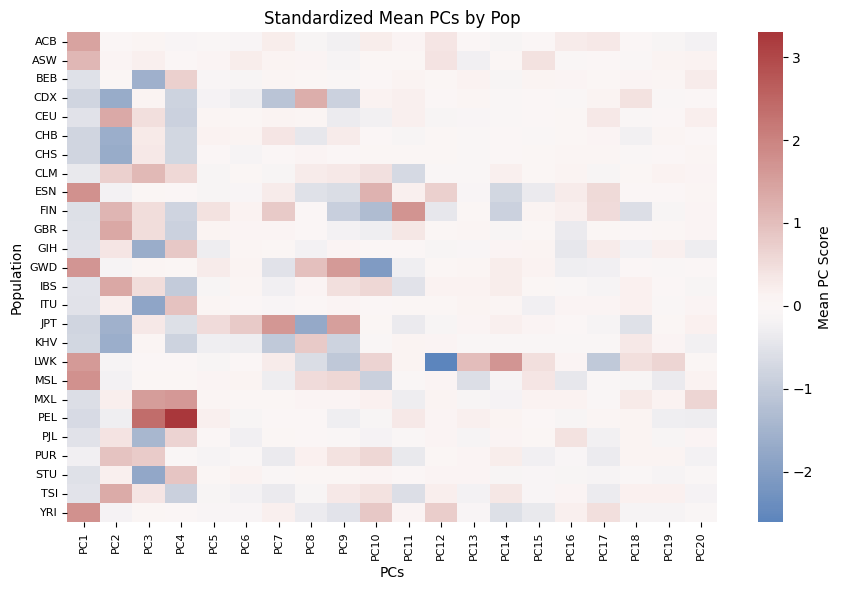

In [16]:
# making PCA plots
## Heatmap of all PCA:

# Finding the mean PC score for each pop
mean_pcs = merged.groupby('Population')[[f'PC{i+1}' for i in range(20)]].mean()
global_std_pcs = merged[[f'PC{i+1}' for i in range(20)]].std()
mean_standerdized_pcsByPop = mean_pcs / global_std_pcs
display(mean_standerdized_pcsByPop.head())

# Heatmap
fig1, (ax3) = plt.subplots(figsize=(9, 6))
heatmap = sns.heatmap(
    mean_standerdized_pcsByPop,
    cmap='vlag',            
    center=0, # 0 = global average
    annot=False,            
    xticklabels=True,
    yticklabels=True,
    ax = ax3,
    cbar_kws={'label': 'Mean PC Score'}
)
ax3.set_title("Standardized Mean PCs by Pop")
ax3.set_xlabel("PCs")
ax3.set_ylabel("Population")
ax3.set_xticklabels(ax3.get_xticklabels(), fontsize=8)
ax3.set_yticklabels(ax3.get_yticklabels(), fontsize=8)
plt.tight_layout()
plt.show()
plt.close(fig1)

Scatter plot of PC1 against PC2 colored by superpop. Then Umap colored by superpop.

/home/marc/miniforge3/envs/vcf-m42-env/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


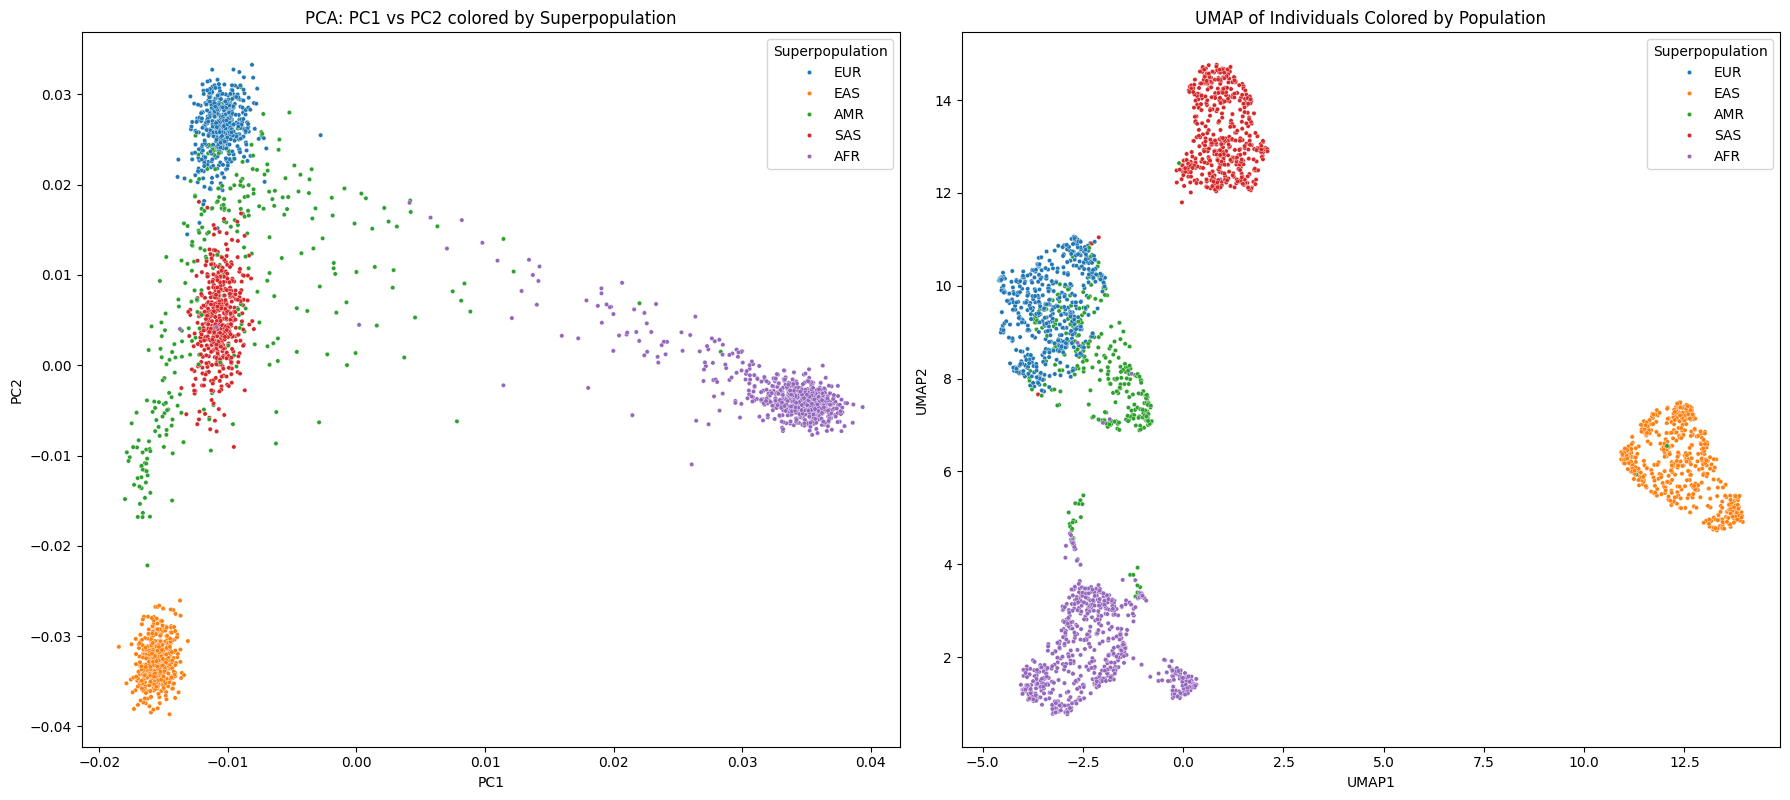

In [17]:

fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))
# Normal Scatter
sns.scatterplot( # ax1
    data=merged,
    x='PC1',
    y='PC2',
    hue='Superpopulation',
    palette='tab10',
    ax=ax1,
    s=10
)
ax1.set_title("PCA: PC1 vs PC2 colored by Superpopulation")
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
ax1.legend(title='Superpopulation', bbox_to_anchor=(1, 1), loc='upper right', ncol=1)


# Umap
pcs_only = merged[[f'PC{i+1}' for i in range(20)]]

# Fit and transform with UMAP
reducer = umap.UMAP(random_state=100)
embedding = reducer.fit_transform(pcs_only)

# Create a DataFrame for plotting
umap_df = merged.copy()
umap_df['UMAP1'] = embedding[:, 0]
umap_df['UMAP2'] = embedding[:, 1]

# Plotting the umap
sns.scatterplot( #ax2
    data=umap_df,
    x='UMAP1',
    y='UMAP2',
    hue='Superpopulation',
    palette='tab10',
    s=10,
    ax = ax2
)
ax2.set_title("UMAP of Individuals Colored by Population")
ax2.set_xlabel('UMAP1')
ax2.set_ylabel('UMAP2')

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()
plt.close(fig2)

# Kinship

Setting up data

In [18]:
kinship = pd.read_csv("kin_outputs/king_results.kin0", sep='\s+', header=0)
kinship_filtered = kinship[kinship['KINSHIP'] >= 0.0884].copy().reset_index(drop=True)
kinship_filtered['KINSHIP_INF'] = np.log1p(kinship_filtered['KINSHIP'])
display(kinship_filtered.head())
print(kinship_filtered.shape[0]) 

,#FID1,IID1,FID2,IID2,NSNP,HETHET,IBS0,KINSHIP,KINSHIP_INF
0,0,HG00120,0,HG00116,748868,0.005150,0.000446,0.171176,0.158008
1,0,HG00123,0,HG00112,748868,0.005514,0.000470,0.171677,0.158436
2,0,HG00148,0,HG00127,748868,0.005129,0.001114,0.100779,0.096018
3,0,HG00240,0,HG00238,748868,0.005259,0.000766,0.132383,0.124324
4,0,HG00329,0,HG00272,748868,0.005264,0.001294,0.099711,0.095047


1366


Making a network graph

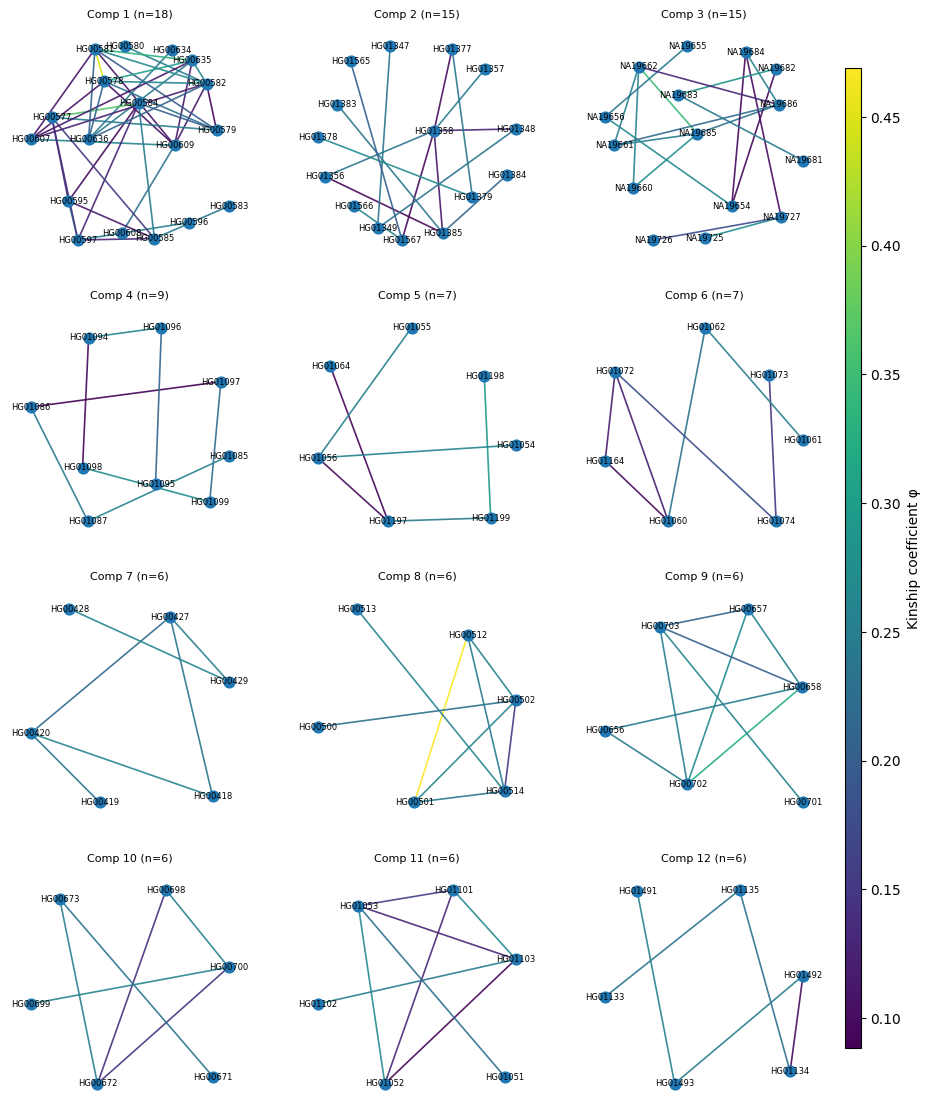

In [19]:
# Build graph
G = nx.Graph()
for _, r in kinship_filtered.iterrows():
    G.add_edge(r['IID1'], r['IID2'], w=float(r['KINSHIP']))

if G.number_of_edges() == 0:
    raise ValueError("No edges after filtering.")

# Components
comps = sorted((G.subgraph(c).copy() for c in nx.connected_components(G)),
               key=lambda g: g.number_of_nodes(), reverse=True)

# Layout grid
K = min(12, len(comps))
rows = int(ceil(sqrt(K)))
cols = int(ceil(K / rows))
fig, axes = plt.subplots(rows, cols, figsize=(3.5*cols, 3.5*rows))
axes = np.ravel(axes)

# Color scale
vmin, vmax = 0.0884, max(0.35, kinship_filtered['KINSHIP'].max())
norm = Normalize(vmin=vmin, vmax=vmax)
cmap = cm.viridis

for i, H in enumerate(comps[:K]):
    ax = axes[i]
    pos = nx.spring_layout(H, weight='w', seed=0, k=1.4)  # k↑ = more spacing
    phi = [H.edges[e]['w'] for e in H.edges()]
    edge_colors = [cmap(norm(p)) for p in phi]

    nx.draw_networkx_edges(H, pos, ax=ax, edge_color=edge_colors, width=1.2, alpha=0.9)
    nx.draw_networkx_nodes(H, pos, ax=ax, node_size=60)  # smaller nodes
    nx.draw_networkx_labels(H, pos, font_size=6, ax=ax)  # all nodes labeled
    ax.set_title(f"Comp {i+1} (n={H.number_of_nodes()})", fontsize=8)
    ax.axis("off")

# Hide unused axes
for j in range(i+1, len(axes)):
    axes[j].axis("off")

# Dedicated colorbar axis
cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])  # [left, bottom, width, height]
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
fig.colorbar(sm, cax=cbar_ax, label="Kinship coefficient φ")

plt.subplots_adjust(right=0.9)  # make space for cbar
plt.show()

# GWAS

There exists no phenotype/trait within 1000genome project. This renders a meaningful GWAS impossible. However, we can arbitrarly assign 1s and 0s to the data and perform a GWAS on this "phenotype", however it will ofcourse be uninfromative and insubstantial. Nonetheless, GWAS architecture remains the same.

In [24]:
#!/usr/bin/env python3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

in_path = "GWAS_outputs/gwas.PHENO1.glm.logistic"

df = pd.read_csv(in_path, delim_whitespace=True, comment="#")
if 'CHROM' not in df.columns and '#CHROM' in df.columns:
    df = df.rename(columns={'#CHROM':'CHROM'})

if 'TEST' in df.columns:
    df = df[df['TEST'].eq('ADD')].copy()

for col in ['CHROM','POS','P']:
    if col not in df.columns:
        raise ValueError(f"required column '{col}' not found in {in_path}")

chrom_map = {
    'X': 23, 'Y': 24, 'MT': 25, 'M': 25, 'chrX': 23, 'chrY': 24, 'chrM': 25, 'chrMT': 25
}

def to_chr_numeric(x):
    s = str(x)
    s = s.replace('chr','')
    if s in chrom_map:
        return chrom_map[s]
    try:
        return int(s)
    except ValueError:
        return np.nan

df['CHR'] = df['CHROM'].apply(to_chr_numeric)
df = df.dropna(subset=['CHR','POS','P']).copy()
df['CHR'] = df['CHR'].astype(int)

chrom_order = sorted(df['CHR'].unique())
chrom_sizes = df.groupby('CHR')['POS'].max().sort_index()
chrom_cumstart = {}
running = 0
for c in chrom_order:
    chrom_cumstart[c] = running
    running += chrom_sizes.get(c, 0)

df['BPcum'] = df.apply(lambda r: r['POS'] + chrom_cumstart[r['CHR']], axis=1)

df = df[df['P'] > 0].copy()
df['mlog10p'] = -np.log10(df['P'])

xticks = []
xlabels = []
for c in chrom_order:
    start = chrom_cumstart[c]
    end = start + chrom_sizes.get(c, 0)
    xticks.append((start + end) / 2)
    xlabels.append(str(c))

plt.figure(figsize=(12,5))
colors = ["C0", "C1"]
for i, c in enumerate(chrom_order):
    idx = df['CHR'].eq(c)
    plt.scatter(df.loc[idx, 'BPcum'], df.loc[idx, 'mlog10p'], s=4, alpha=0.7, c=colors[i % 2])

plt.axhline(-np.log10(5e-8), linestyle='--', linewidth=1)
plt.axhline(-np.log10(1e-5), linestyle=':', linewidth=1)

plt.xticks(xticks, xlabels, fontsize=8)
plt.xlabel('chromosome')
plt.ylabel('-log10(p)')
plt.title('Manhattan plot: gwas.PHENO1.glm.logistic (ADD)')
plt.margins(x=0)
plt.tight_layout()
plt.show()

/tmp/ipykernel_1442/810494677.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(in_path, delim_whitespace=True, comment="#")


FileNotFoundError: [Errno 2] No such file or directory: 'GWAS_outputs/gwas.PHENO1.glm.logistic'